## Credit Card Fraud Detection -Data Analytics


#### Using data analytics and machine learning models, the objective is to recognise and anticipate fraudulent credit card transactions.

Data Preparation:EDA,Data cleaning ,removing unnecessary columns

### <font color=purple>Install all the necessary packages

In [13]:

!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install simple_colors     
!pip install chardet                     
!pip install imblearn      
!pip install imbalanced-learn  
!pip install -U seaborn    


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\satyanarayana rk\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [14]:
## Importing all the necessary libraries

# For plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## time and datetime
import datetime
import time

## To suppress warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.random.seed(0)  # It enables you to provide the starting input for numpy pseudo-random number generator.
import pandas as pd
import chardet
import os
import pickle
from collections import Counter

## for bold text
from simple_colors import *

## Pandas DataFrame display options
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_seq_items', None) #For printing a long-sequence

In [15]:

def plot_confusion_matrix(cm):
    classes=['Non-Fraudulent','Fraudulent']
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize= 10)
    plt.xlabel('Predicted label', fontsize=10)




## <font color=green>Exploratory Data Analysis (EDA)

### <font color=Brown>Checking File Encoding

In [17]:
##Confirming the encoding of the 'creditcard.csv' (dataset) file
file_path = os.path.join('creditcard.csv')
raw_data = open(file_path, 'rb').readline()

encoding = chardet.detect(raw_data)
print("File encoding details:\n",encoding)

File encoding details:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


**Observation:** Since the coding is 'ASCII', we can now proceed with reading the dataset.

### <font color=Brown>Reading the dataset

In [18]:
## Read the dataset: 'creditcard.csv' 
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### <font color=Brown>Data Understanding, Cleaning and Manipulation

In [20]:
## Check number of records and feature columns (df.shape)
df.shape

(284807, 31)

In [21]:
## Columns in the DataFrame
df= df.rename(columns=lambda x: x.strip())   ##Removing whitespaces in column names (if any)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
## Observing different feature types present in the data (dataframe summary)
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observations:**<br>(i) The `features (V1, V2, V3, up to V28)` are the `principal components` *(numerical input components)* obtained using `PCA`.<br>
(ii) The `feature 'Time'` *contains the seconds* elapsed between the first transaction in the data set and the subsequent transactions.<br>
(iii) The `feature 'Amount'` is the *transaction amount*.<br>
(iv) The `feature 'Class'` represents *class labelling*. (0: Normal Transactions, 1: Fraud Transactions)<br>

In [23]:
# Statistics summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observation:** No missing values found in the feature columns and output class.

Here we will observe the distribution of our classes.

In [24]:
## Observing distribution of classes (0: Normal Transactions, 1: Fraud Transactions)

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(black("Distribution of Classes: (0: Normal Transactions, 1: Fraud Transactions)\n",'bold')+ \
      f"{classes}")

print(black(f"Percentage of Normal Share (Non-Fraudulent Transactions(%)):\n",'bold')+ \
      f"{round(normal_share,4)} %")

print(black(f"Percentage of Fraud Share (Fraudulent Transactions(%)):\n",'bold')+ \
      f"{round(fraud_share,4)} %")

Distribution of Classes: (0: Normal Transactions, 1: Fraud Transactions)
0    284315
1       492
Name: Class, dtype: int64
Percentage of Normal Share (Non-Fraudulent Transactions(%)):
99.8273 %
Percentage of Fraud Share (Fraudulent Transactions(%)):
0.1727 %


### <font color=purple>Univariate and Bivariate Analysis

In [25]:
## Let's define a function for scatter plot
def scatter_plot(my_figsize, title, my_data, x, y, x_unit):
    fig = plt.figure(figsize= my_figsize)
    cmap = sns.color_palette('Set1')
    
    df= my_data.copy()
    plt.figure(figsize=(10,5), dpi=100)
    sns.set_style("whitegrid")
    sns.scatterplot(x= x, y= y, data=df)
    plt.title((f"{title}"), fontweight='bold', fontsize=15, y=1.02)
    plt.xlabel(x+f" {x_unit}", fontsize=13, fontstyle='italic')
    plt.ylabel(y, fontsize=13, fontstyle='italic')
    
    plt.grid(True)
    plt.autoscale()
    plt.tight_layout()
    plt.show()

<Figure size 864x1008 with 0 Axes>

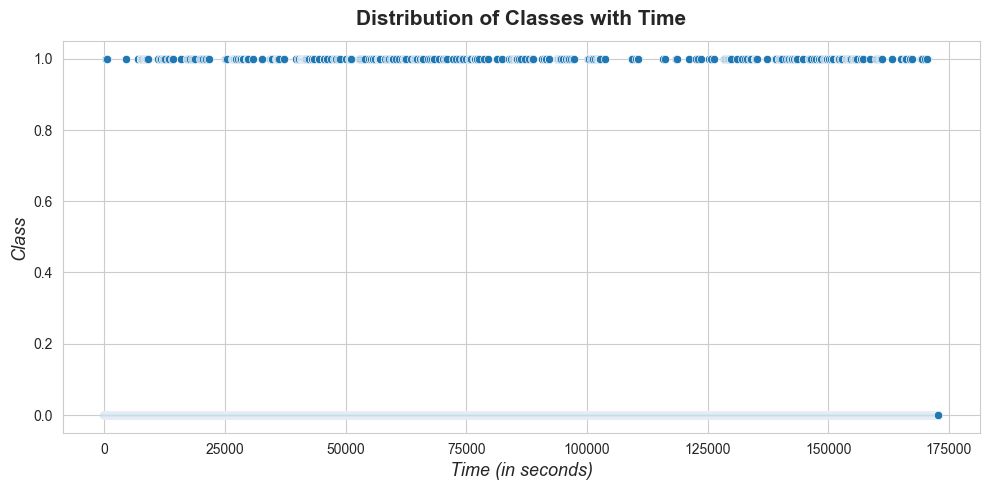

In [26]:
# Create a scatter plot to observe the distribution of classes with Time
scatter_plot(my_figsize=(12,14), title= "Distribution of Classes with Time", my_data=df,\
             x="Time", x_unit="(in seconds)", y="Class")

**Observation:** <br>Clearly we see the distinction in the number of fraud cases (Class Label:1) with respect to normal cases (Class Label: 0) where the latter being extremely high in number in comparison to the former class.

**Note:**<br> The dataset contains transactions made by credit cards in September 2013 by european cardholders, it would be safe to assume the default Currency for 'Amount' feature as **EURO (EUR)** i.e. **€** .

<Figure size 864x1008 with 0 Axes>

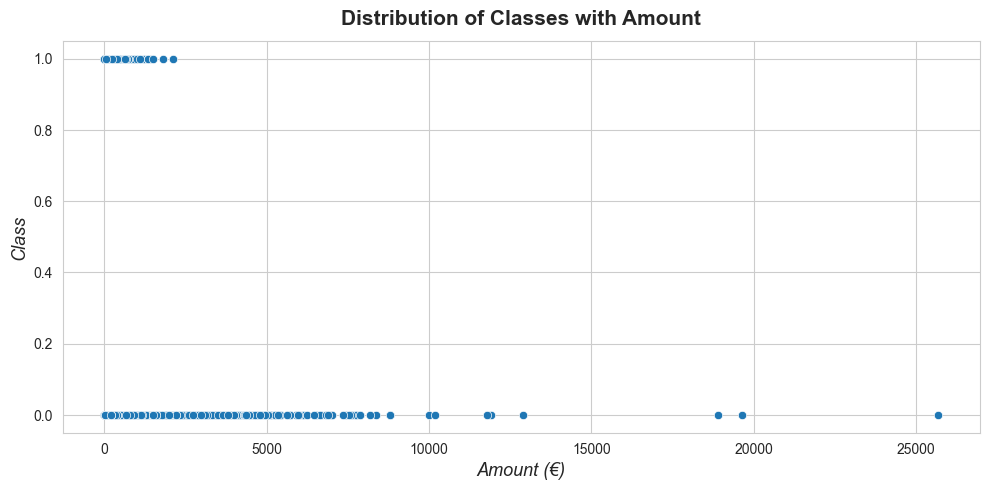

In [27]:
# Create a scatter plot to observe the distribution of classes with Amount
scatter_plot(my_figsize=(12,14), title= "Distribution of Classes with Amount", my_data=df,\
             x="Amount", x_unit="(€)", y="Class")

(Observation mentioned after analysis of statistical summary and visualization of `'Amount'` feature.)

In [28]:
## Let's find the maximum transaction amount in Fraud Cases (Class Label: 1).
max_trnsctn_fraud= df[df.Class==1]["Amount"].max()
print(f"Maximum fraud transaction amount: €{max_trnsctn_fraud}")

Maximum fraud transaction amount: €2125.87


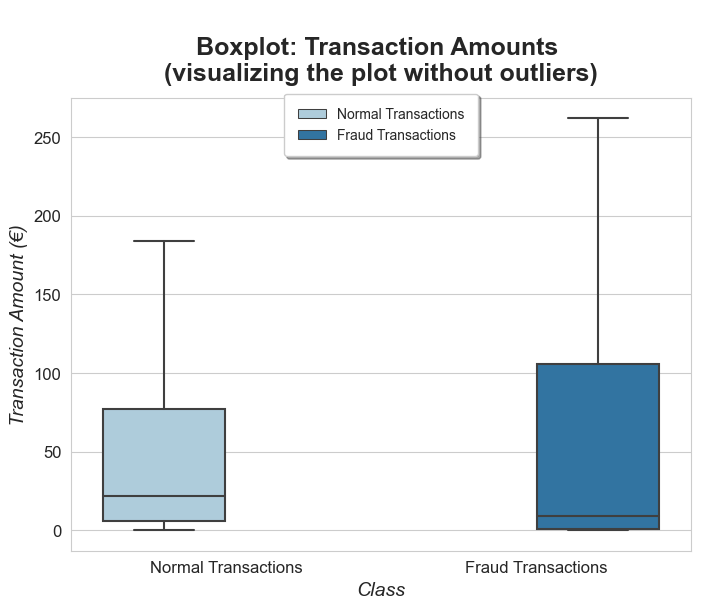

In [29]:
## Visualising the statistics of transaction amounts
plt.figure(figsize=(8,6), dpi=100)
sns.set_style("whitegrid")

 ## Note: Set (showflier=False) to eliminate the effect of outliers in the transaction amounts
ax_31= sns.boxplot(data=df, y="Amount", x="Class", hue="Class",showfliers=False, palette=("Paired")) 
ax_31.set_xticklabels(labels=['Normal Transactions','Fraud Transactions'], fontsize=12)
plt.title(f"\nBoxplot: Transaction Amounts \n(visualizing the plot without outliers)", fontsize=18, fontweight='bold', y=1.02)
plt.ylabel("Transaction Amount (€)", fontsize=14, fontstyle='italic')
plt.xlabel("Class", fontsize=14, fontstyle='italic')
plt.yticks(fontsize=12)

#legend
L31= ax_31.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L31.get_texts()[0].set_text('Normal Transactions')
L31.get_texts()[1].set_text('Fraud Transactions')

plt.show()

**Note:**<br>
In the above boxplot, we have eliminated the effect of outliers in the transaction amounts. This helps us in better understanding the range of most of the values.

**Observations:**
<br>(i) From the plot of distribution of classes with respect to transaction amount, it is quite evident that the `transaction amounts for fraud cases were lesser than approximately €2200`.
<br>(ii) Precisely, `average fraud transaction amount is approximately €122` (from statistical summary) and `maximum fraud transaction amount is €2125.87`.
<br>(iii) `Normal transactions have a wide-range of amounts with certain outliers` (as seen from the plot of Distribution of Class with Amount).

**Analyzing the `Time` variable before we come to any conclusion.**

In [30]:
df.Time.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [31]:
df.Time.tail()

284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [32]:
## Using pandas 'to_timedelta' to convert pandas Series from a recognized timedelta format / value into a Timedelta type
Time_Delta= pd.to_timedelta(df.Time, unit='s')
Time_Delta.head()

0   0 days 00:00:00
1   0 days 00:00:00
2   0 days 00:00:01
3   0 days 00:00:01
4   0 days 00:00:02
Name: Time, dtype: timedelta64[ns]

In [33]:
Time_Delta.tail()

284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, dtype: timedelta64[ns]

**Deriving new 'Time' features for analysis**

In [34]:
## Extracting the number of days, hours and minutes from 'Time_Delta' variable.
df['Time_Days']= (Time_Delta.dt.components.days).astype(int) ## Number of days
df['Time_Hours']= (Time_Delta.dt.components.hours).astype(int) ## Number of hours
df['Time_Minutes']= (Time_Delta.dt.components.minutes).astype(int) ## Number of minutes

df[['Time', 'Time_Days', 'Time_Hours', 'Time_Minutes']].tail()  ##Checking the tail for verifying successful operations

,Time,Time_Days,Time_Hours,Time_Minutes
284802,172786.0,1,23,59
284803,172787.0,1,23,59
284804,172788.0,1,23,59
284805,172788.0,1,23,59
284806,172792.0,1,23,59


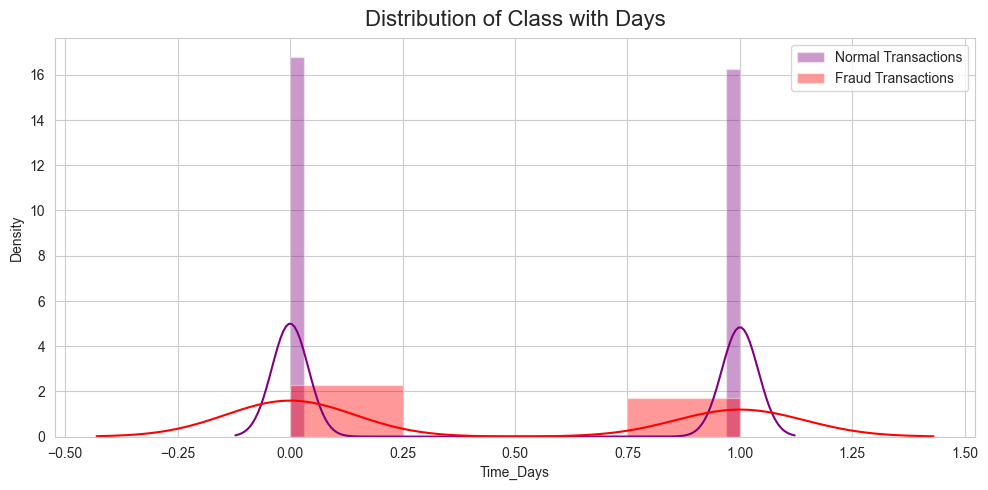

In [35]:
## Analyzing distribution of classes with days

plt.figure(figsize=(10,5), dpi=100)

sns.distplot(df[df.Class == 0]["Time_Days"], label= "Normal Transactions", color='purple')
sns.distplot(df[df.Class == 1]["Time_Days"], label= "Fraud Transactions", color= 'red')

plt.title('Distribution of Class with Days', fontsize=16, y=1.01)
plt.legend()
plt.tight_layout()
plt.show()

**The following is a notation: In contrast to fraudulent transactions, it is "clear that the density of non-fraudulent (normal) transactions is relatively high."
(ii)Due to the fact that we only have data for days 0 and 1, the "Time Days" feature 
 "doesn't offer much information"**

In [36]:
## Checking the hour at which most frauds occur
num_fraud_hrs= df[df.Class==1]['Time_Hours'].value_counts()
num_fraud_hrs

2     57
11    53
18    33
17    29
15    26
4     23
7     23
14    23
16    22
23    21
19    19
20    18
13    17
12    17
3     17
9     16
21    16
5     11
1     10
8      9
6      9
22     9
10     8
0      6
Name: Time_Hours, dtype: int64

In [37]:
## Check total number of hours (must round to 24)
len(num_fraud_hrs)

24

**Observations:**  
i)With regard to fraud transactions, **"No distinct fixed pattern** (may be discerned from the hours)" is true. 
(ii) The distribution map of regular transactions allows us to deduce that **"the majority of normal transactions occurred between the hours of 8:00 and 0:00".** 
(iii) **"Normal transactions are less frequent throughout the nighttime"(between 00 p.m. and 08:00 a.m.)**.
(iv) **"The majority of fraud transactions occurred at 02:00 (57 total transactions)**, 1100 (53 total transactions), and 1800 (33 total transactions)," correspondingly. Early in the morning, "at 06:00 hours," "No Fraud Transactions" took place.**


**We may remove all the time variables from the "Time" feature, "Time Days", "Time Hours", and "Time Minutes" feature columns because this "is not a time-series problem" and "no more insights" can be "derived from the "Time" feature and associated derived time features."**

In [38]:
# Drop unnecessary columns 
drop_columns= ["Time","Time_Days","Time_Hours", "Time_Minutes"]  # (all time variables - original and derived ones)
df.drop(drop_columns, axis=1, inplace= True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### <font color=purple> Correlation Analysis 

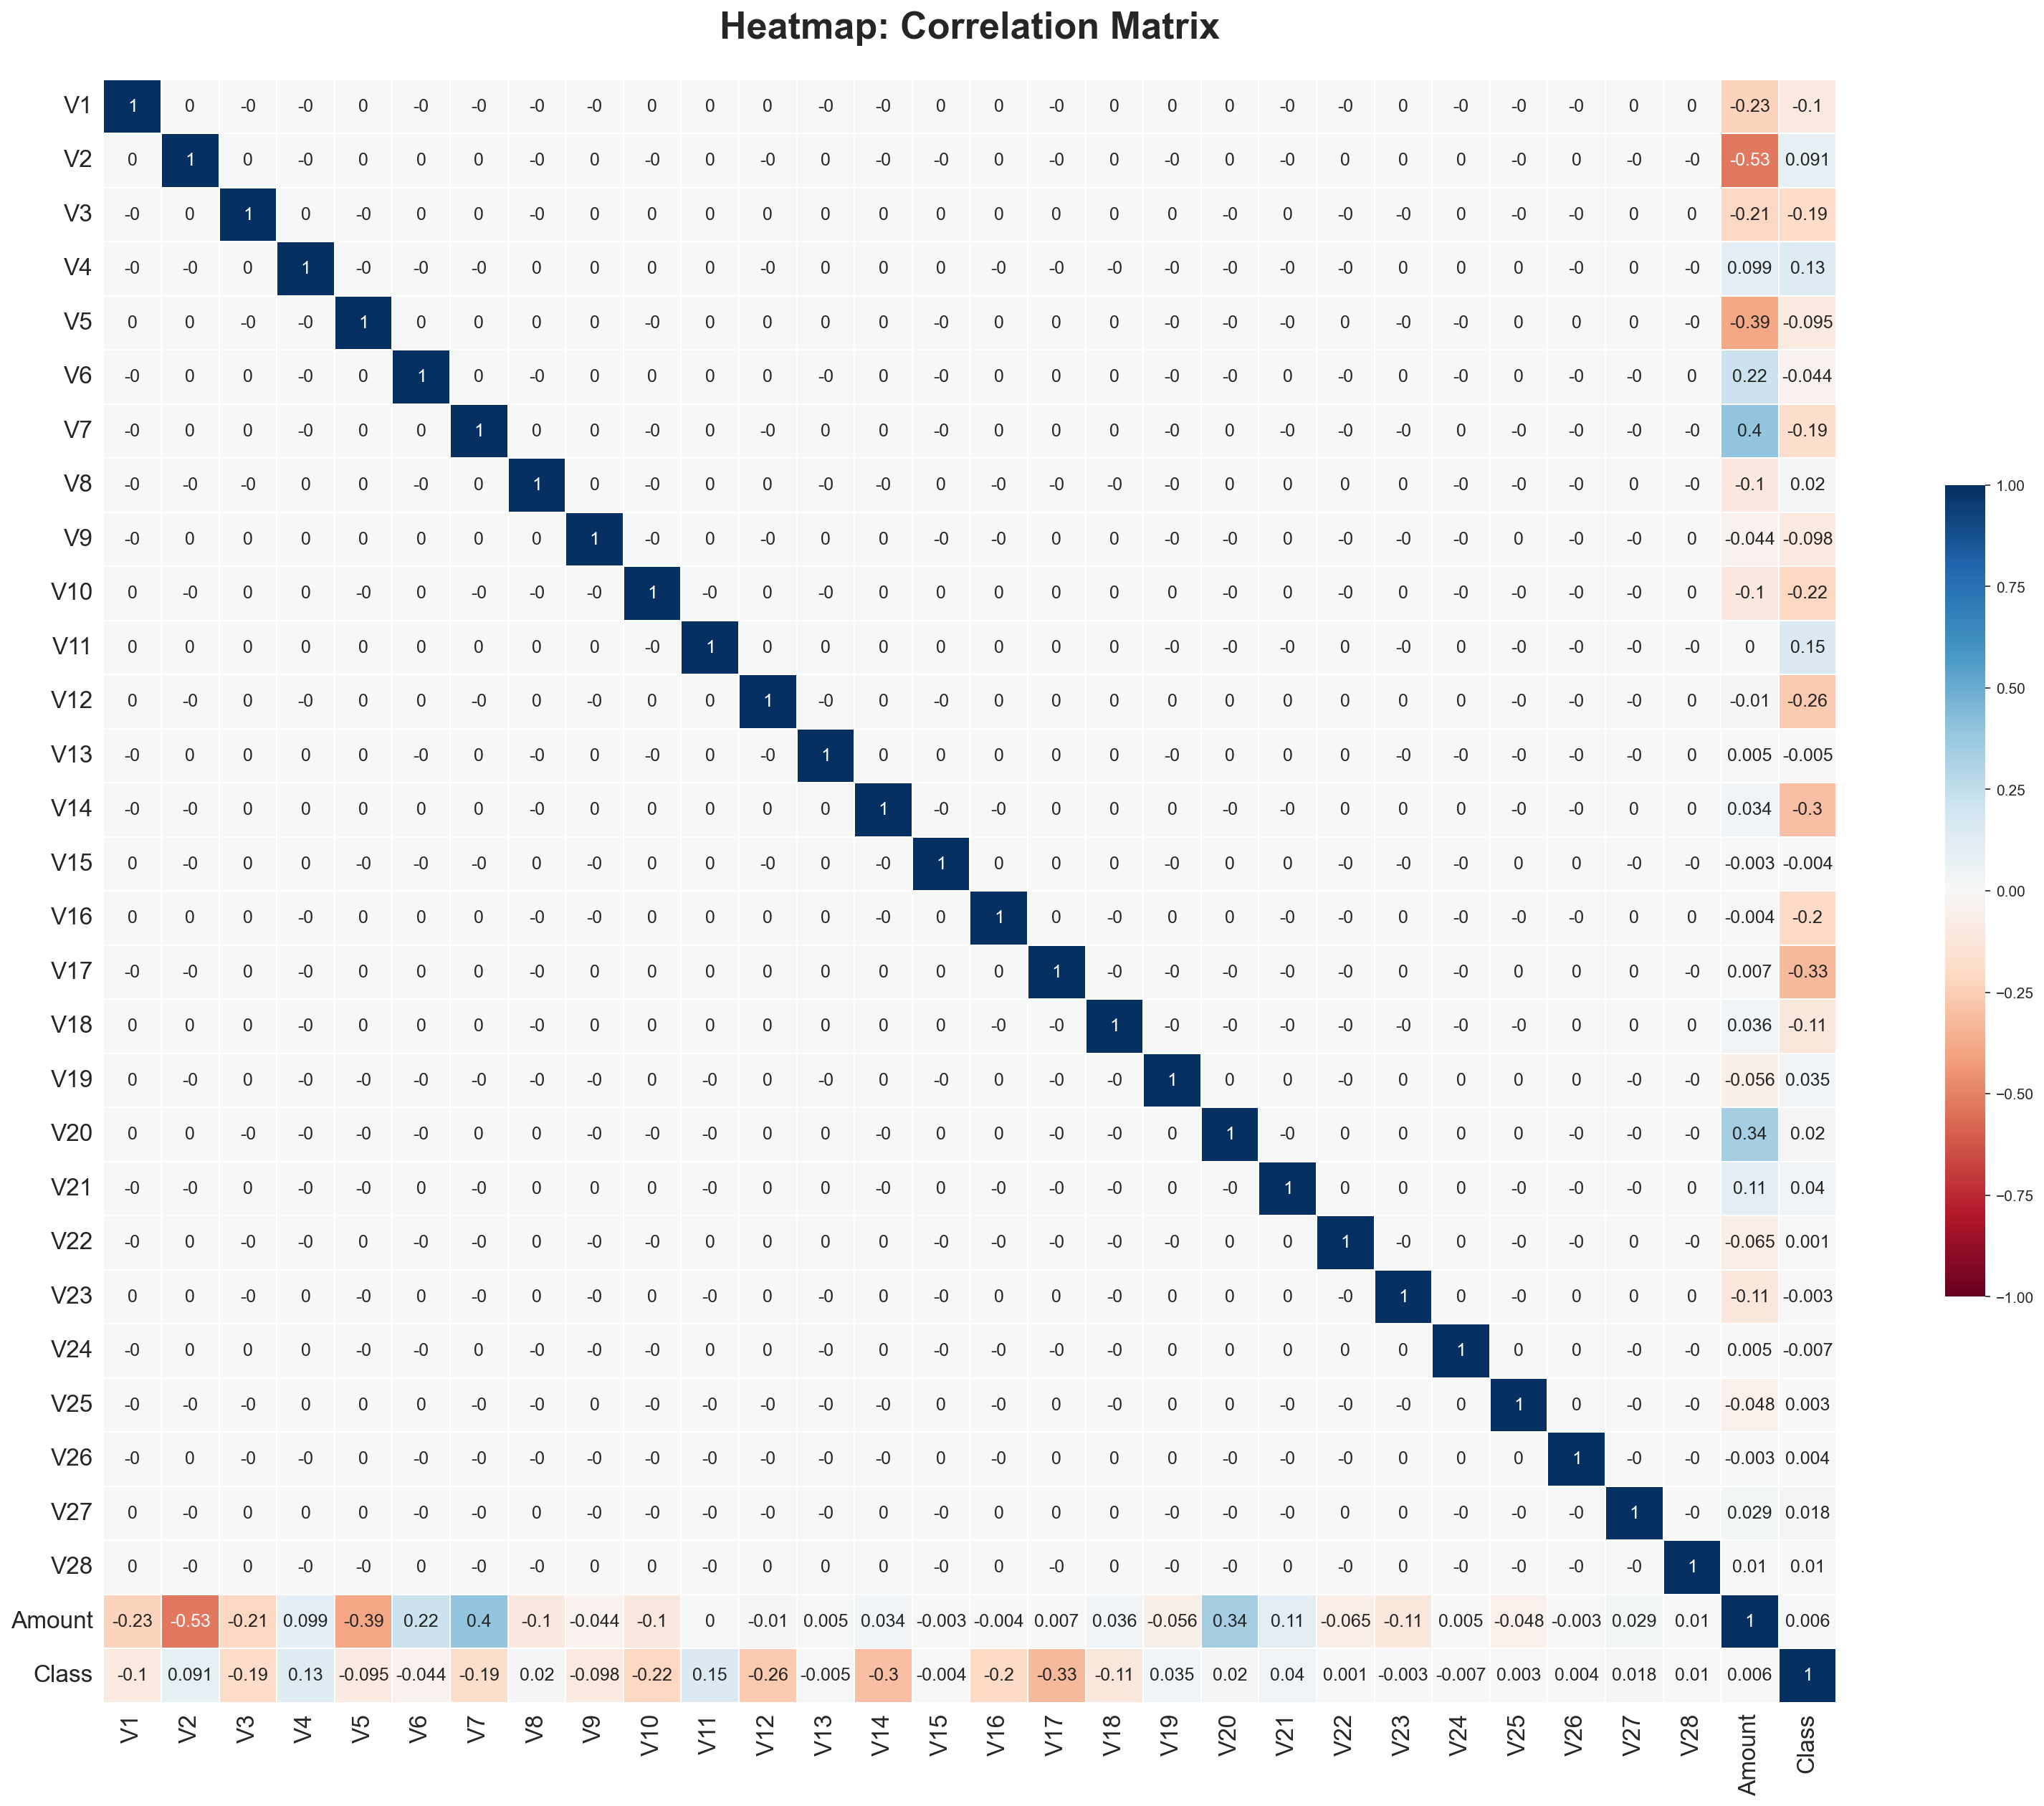

In [39]:

# heatmap-the correlation between the independent variables
corr_matrix = df.corr()
corr_matrix_round= round(corr_matrix, 3)
f, ax_corr = plt.subplots(figsize=(26,20), dpi=150)
ax_corr = sns.heatmap(corr_matrix_round,annot=True,cmap="RdBu", cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, rotation=0)
plt.title("Heatmap: Correlation Matrix", y=1.02, fontsize=25, fontweight='bold')
plt.show()

**Observations:**<br>
(i) `PCA components (V1, V2 upto V28) clearly don't show any sign of multi-collinearity with each other`.<br>
(ii) `Some degree of correlation` can be seen `between PCA Components and the 'Amount' feature`.

In [40]:
## Analyzing Top 10 correlated PCA components with 'Class'
corr_matrix_class_only= pd.DataFrame(corr_matrix['Class'])
corr_matrix_class_only["absolute_corr_val"]= corr_matrix_class_only.apply(lambda x: abs(x))

## Sorting in descending order (of absolute values of correlation coefficients)
corr_matrix_top10_class_only= corr_matrix_class_only.sort_values(by="absolute_corr_val", ascending=False)[1:11] 
print(black(f"Top 10 feature variables related with Class:\n {list(corr_matrix_top10_class_only.index)}",'bold') );print()

## Top 10 correlated variables with class (except Class variable)
top10_df= pd.DataFrame({"Rank": np.arange(1,11), "Top10_Feature_Variables": corr_matrix_top10_class_only.index, \
                       "Correlation_with_Class": corr_matrix_top10_class_only.Class})
top10_df.set_index("Rank", inplace=True)
top10_df

Top 10 feature variables related with Class:
 ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']



,Top10_Feature_Variables,Correlation_with_Class
Rank,,
1,V17,-0.326481
2,V14,-0.302544
3,V12,-0.260593
4,V10,-0.216883
5,V16,-0.196539
6,V3,-0.192961
7,V7,-0.187257
8,V11,0.154876
9,V4,0.133447


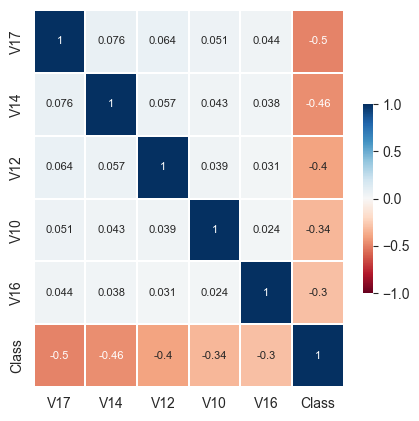

In [41]:
## Visualizing correlation of Top5 feature variables with 'Class' 
top5_features= list(corr_matrix_top10_class_only.index)[0:5]
top5_features.append('Class')
corr_matrix_top= corr_matrix[top5_features].corr()
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(corr_matrix_top, cmap= "RdBu", annot= True,cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":8})
plt.show()

**Observation:** `Top 5 feature variables correlated with the dependent variable 'Class'` are **`V17, V14, V12, V10 and V16`** respectively. 

## <font color=green>Splitting the data into train & test data

In [42]:
# sklearn packages (for pre-processing, model-building, evaluators, cross-validators, etc.)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit

The class labels are binary encoded. So retaining them as is.

In [43]:
## Create X and y dataset for independent and dependent data
y= df['Class']        #Class variable
X= df.drop("Class", axis=1)

### <font color=brown>Stratified Train-Test Split

In [44]:
## Splitting the data into train and test data  (80:20)

## Create a STRATIFIED train-test (Hence, passing the argument 'stratify= y')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20, stratify= y)   

In [45]:
## Checking class distribution in stratified train-test split
print(black("In y dataset:",'bold'), Counter(y))
print(black("\nIn y_train set:",'bold'), Counter(y_train))
print(black("\nIn y_test set:",'bold'), Counter(y_test))

In y dataset: Counter({0: 284315, 1: 492})

In y_train set: Counter({0: 227451, 1: 394})

In y_test set: Counter({0: 56864, 1: 98})


**Observation:** We have successfully **split the imbalanced dataset in the train-test split ratio (80:20) using stratified train-test-split**.

##### <font color=green>Preserve X_test & y_test to evaluate on the test data once you build the model

In [46]:
# Note: The stratified train-test split ratio wasn't mentioned in the starter code. 
# Considering train_test_split ratio (80:20)

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [48]:
 #Imblearn packages (for over_sampling and imblearn pipelines)
from imblearn import over_sampling
from imblearn.over_sampling import  ADASYN
from imblearn.pipeline import Pipeline, make_pipeline  ## Using packages from imblearn.pipeline for making pipelines

**Dealing with skewness in the data using Power Transformer to make distribution more Gaussian**

In [49]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train data & transform the test data

## For X dataset (train and test) 
pt = PowerTransformer(copy=False)                  ## Instantiate an object of PowerTransformer() class 
X_train_pt= pt.fit_transform(X_train)              ## fit_transform train set
X_test_pt = pt.transform(X_test)                   ## Transform only: test set

In [50]:
## Create a dataframes for PowerTransformed 'X_train' and 'X_test' respectively (to be used later)
X_train_pt_df= pd.DataFrame(data= X_train_pt, columns= list(X.columns))
X_test_pt_df= pd.DataFrame(data= X_test_pt, columns= list(X.columns))

## <font color=green>**Model Building**
- Build different models on the imbalanced dataset and see the result

In [51]:
#Create a pandas dataframe to store model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'ROC_AUC_cv', 'ROC_AUC_test', 'Threshold', 'Precision','Recall','F1 score'])

In [52]:
## Define a function to plot ROC_AUC curve
def plot_roc_auc_curve(fpr, tpr, roc_auc):
    print(f"ROC for test dataset {round(roc_auc*100,3)}%")  
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr,tpr,'b',label="Test ROC_AUC="+str(round(roc_auc,3)))
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.legend(loc='lower right')
    plt.show()

In [53]:
## Function for printing the cross-validation results:
def best_cross_val_results(clf,data_handling_technique, model_name):
    print(black(f"\nData Handling Technique: {data_handling_technique}\nModel Name: {model_name}",'bold'))
    print(black("\n\nEvaluation results from cross-validation and optimal hyperparameters",'bold'))
    # Best Model and optimal hyperparameters
    print("Best Estimator:\n", clf.best_estimator_._final_estimator)
    print("Best ROC_AUC (mean cross-validated score):", clf.best_score_)
    print("Best (Optimal) Parameters:", clf.best_params_)

In [54]:
# Function for prediction and evaluation results on test data:
def prediction_evaluation_results(clf,X_train,y_train,X_test,y_test, data_handling_technique,model_name,results_df):
    print(black("\nPrediction and Evaluation results: On Actual TEST SET",'bold'))
    y_pred= clf.predict(X_test)                                             # Find predicted values
    y_pred_probs = clf.predict_proba(X_test)[:,1]                           # Find predicted probabilities
    precision = metrics.precision_score(y_pred=y_pred, y_true=y_test)           # Precision and Recall Scores
    recall= metrics.recall_score(y_pred=y_pred, y_true=y_test)
    f1_score= metrics.f1_score(y_pred=y_pred, y_true=y_test)                    # f1_score
    test_roc_auc = metrics.roc_auc_score(y_score= y_pred_probs, y_true=y_test)  # Test ROC_AUC
    print(f"\nTest ROC_AUC: {test_roc_auc}")
    test_accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)        # test accuracy
    print(f"Test Accuracy: {test_accuracy}");print()
    print("Confusion Matrix")                                                   # print confusion matrix
    print("Classification Report")                                              # Print classification report
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs)              # fpr, tpr and threshold
    threshold= thresholds[np.argmax(tpr-fpr)]                                   # Find the optimal threshold value
    print("Optimal Threshold:", threshold)
    plot_roc_auc_curve(fpr, tpr, test_roc_auc)                                  # Plot ROC_AUC curve for test dataset (using defined function)
    ## Store results 
    results_store_df= pd.DataFrame({'Data Handling Technique': [data_handling_technique],'Model': [model_name],
                            'ROC_AUC_cv': [clf.best_score_],'ROC_AUC_test': [test_roc_auc],'Threshold': [threshold],
                                    'Precision': [precision],'Recall': [recall],'F1 score':[f1_score]})
    return results_store_df

### <font color=purple>Defining functions to build the following ML models:</font>
1. Logistic Regression
2. Decision Tree


#### <font color=darkblue>1. Logistic Regression Model with StratifiedKFoldCV

*(Note: num_C and cv_num are defined in the function LogisticRegression_StratifiedKFoldCV_Model()* - (below)

In [55]:
## Define a function LogisticRegression_StratifiedKFoldCV_Model() to cross-validate, tune hyperparameters, 
## build optimal model and provide evaluation results.

def LogisticRegression_StratifiedKFoldCV_Model(sampling_technique, X_train, y_train, X_test, y_test, data_handling_technique, model_name, results_df):
    start= time.time();print("*"*100)
    np.random.seed(0)
    num_C= list(np.power(10.0, np.arange(-4,5)))                           #--> ## list of values -- num_C (i.e. Cs values) (Hyperparameter of LogisticRegression Model)
    # Performing cross-validation and hyperparameter tuning
    cv_num= 3                                                              # Note: cv_num: number of cross-validation splits
    skf = StratifiedKFold(n_splits= cv_num, random_state=0, shuffle=True)  # StratifiedKFold cross-validator 

    # Create a pipeline: 
    if sampling_technique==None:
        pipe_lr= make_pipeline(LogisticRegression(n_jobs=-1,max_iter=1000,random_state=0))
    else:
        pipe_lr = make_pipeline(sampling_technique, LogisticRegression(n_jobs=-1,max_iter=1000,random_state=0))
    # Param_distributions (Create both estimators: find optimal estimator- L1/L2 regularization)
    params_lr= [{ 
                "logisticregression__penalty": ['l2'],
                "logisticregression__C":num_C,
                "logisticregression__solver":['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'] # solvers that allow L2 penalty
                },
                {
                "logisticregression__penalty": ['l1'],
                "logisticregression__C":num_C,
                "logisticregression__solver":['saga', 'liblinear']  # solvers that allow L1 penalty
                }]
    clf= RandomizedSearchCV(                                               ## Performs Cross-validation 
                          estimator=pipe_lr, 
                          param_distributions=params_lr,                   ## Hyperparameters to be tuned
                          n_jobs=-1, 
                          cv=skf,
                          scoring='roc_auc',                               ## Scoring metric 'roc_auc'
                          verbose = 1,
                          return_train_score=True,
                          error_score=0)
    clf.fit(X_train_pt,y_train)
    optimal_solver= clf.best_params_['logisticregression__solver']  ## Storing optimal hyperparameters in variables
    optimal_penalty= clf.best_params_['logisticregression__penalty']
    optimal_C= float(clf.best_params_['logisticregression__C'])
    best_cross_val_results(clf,data_handling_technique, model_name)        ## Get best cross_validation result
    ##Initialize the classifier with optimal hyperparameters  
    clf_opt= clf.best_estimator_._final_estimator    ## Best estimator already found out above, after fitting on (X_train,y_train)

    print(black("\nOptimal hyperparameters:",'bold'))
    print("Best C value:", optimal_C)
    print("Best penalty:", optimal_penalty)
    print("Best solver:", optimal_solver)
    # prediction and evaluation results on actual TEST data
    results_store_df= prediction_evaluation_results(clf, X_train, y_train, X_test, y_test,
                                                data_handling_technique, model_name, results_df) 
    results_df= results_df.append(results_store_df, ignore_index=True)   ## Appending the results to 'results_df' dataframe
    end= time.time()
    time_req_mins = (end-start)/60
    print(f"\nTime required to train the model: {round(time_req_mins)} minutes");print("*"*100)
    return results_df, clf_opt

#### <font color=darkblue>2. Decision Tree Model with StratifiedKFoldCV

In [56]:
## Defining a function for building a  DecisionTree_StratifiedKFoldCV_Model() - to cross-validate, tune hyperparameters,  
##  build optimal model and provide evaluation results.

def DecisionTree_StratifiedKFoldCV_Model(sampling_technique,X_train, y_train, X_test, y_test, data_handling_technique, model_name, results_df):
    start= time.time()
    print("*"*100)
    
    np.random.seed(0) ## StratifiedKFold cross-validator
    cv_num=3
    skf = StratifiedKFold(n_splits= cv_num, random_state=0, shuffle=True)       ## Note: number of cross-validation splits, cv_num=3 (defined previously)   
    ## Perform cross-validation and hyperparameter tuning 

    # Create a pipeline: (Advatange: Flow of code and pipelines also make sure that validation sets are not oversampled within folds)
    if sampling_technique==None:
        pipe_dt= make_pipeline(DecisionTreeClassifier(random_state=0))                          # Defining the model 
    else:
        pipe_dt= make_pipeline(sampling_technique, DecisionTreeClassifier(random_state=0))
        
    max_depth=list(range(3,10,1))                                        ## Hyperparameter: max_depth to be tuned
    min_samples_leaf= [1,2,4,10,20,30]                                   ## Hyperparameter: min_samples_leaf to be tuned
    criterion= ['gini','entropy']                                        ## Hyperparameter: criterion to be tuned
    max_features=['sqrt','log2',None]                                    ## Hyperparameter: max_features to be tuned
    min_samples_split=[2,3,5,10,20,30,50]
    # Params_distributions
    params_dt={ 
                'decisiontreeclassifier__min_samples_split': min_samples_split,
                'decisiontreeclassifier__min_samples_leaf':min_samples_leaf,
                'decisiontreeclassifier__max_features':max_features,
                'decisiontreeclassifier__max_depth':max_depth,
                'decisiontreeclassifier__criterion':criterion}
  
    clf= RandomizedSearchCV(                                                    # Performing cross-validation
                            estimator=pipe_dt, 
                            param_distributions=params_dt,
                            n_jobs=-1, 
                            cv=skf,
                            scoring='roc_auc',                                  ## Scoring metric 'roc_auc'
                            verbose = 1,
                            n_iter=50,
                            return_train_score=True,
                            error_score=0)
    clf.fit(X_train, y_train)   
    optimal_min_samples_split=int(clf.best_params_['decisiontreeclassifier__min_samples_split'])  ## Storing optimal hyperparameters
    optimal_min_samples_leaf=int(clf.best_params_['decisiontreeclassifier__min_samples_leaf'])
    optimal_max_features= clf.best_params_['decisiontreeclassifier__max_features']  
    optimal_max_depth= int(clf.best_params_['decisiontreeclassifier__max_depth'])    
    optimal_criterion= clf.best_params_['decisiontreeclassifier__criterion']      
    best_cross_val_results(clf,data_handling_technique, model_name)          # Get best cross_validation results
    # Initialize the model with optimal hyperparameters
    clf_opt= clf.best_estimator_._final_estimator     ## Best estimator already found out above, after fitting on (X_train,y_train)

    print(black("\nOptimal hyperparameters:",'bold'))
    print("Best min_samples_split:", optimal_min_samples_split)
    print("Best min_samples_leaf:", optimal_min_samples_leaf)
    print("Best max_features:", optimal_max_features)
    print("Best max_depth:", optimal_max_depth)
    print("Best criterion:", optimal_criterion)
    # prediction and evaluation results on actual TEST data
    results_store_df= prediction_evaluation_results(clf, X_train, y_train, X_test, y_test, 
                                                    data_handling_technique, model_name, results_df)
    results_df= results_df.append(results_store_df, ignore_index=True)  ## Appending the results to 'results_df' dataframe
    end= time.time()
    time_req_mins = (end-start)/60
    print(f"\nTime required to train the model: {round(time_req_mins)} minutes")
    print("*"*100)
    return results_df, clf_opt 

### <font color=Brown>**Model building on Imbalanced Dataset**

#### <font color=DarkBlue> **1. Logistic Regression Model (Imbalanced Dataset)**

In [57]:
## Logistic Regression
num_C = list(np.power(10.0, np.arange(-4,5)))    ## list of values 

# StratifiedKFold cross-validator
cv_num =3   ##  cv_num->number of cross-validation splits
skf = StratifiedKFold(n_splits= cv_num, random_state=0, shuffle=True)   

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

**Perform StratifiedKFold Cross Validation on X_train (i.e. X_train_pt_df) and y_train**

In [58]:
## Let's perform StratifiedKFold strategy and check the results of folds (splits)
cv_num= 3                  ## Specify num of cv splits in cv_num
skf = StratifiedKFold(n_splits= cv_num, random_state=0, shuffle=True)  

# 'X_train_pt_df' is the feature set (Power Transformed X_train dataframe) and y_train is the target train set
print("Overview of StratifiedKFoldCV splits:")
for train_index, test_index in skf.split(X_train_pt_df,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train_pt_df.iloc[train_index], X_train_pt_df.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

Overview of StratifiedKFoldCV splits:
TRAIN: [     0      1      3 ... 227841 227842 227844] TEST: [     2      4      6 ... 227829 227836 227843]
TRAIN: [     1      2      3 ... 227842 227843 227844] TEST: [     0      9     12 ... 227837 227838 227841]
TRAIN: [     0      2      4 ... 227838 227841 227843] TEST: [     1      3      5 ... 227840 227842 227844]


*We will be performing cross-validation `using RandomizedSearchCV and passing model via 'imblearn pipeline'` as stated in the modeling approach `(which performs the StratifiedKFold cross-validation in a similar fashion as seen above)`.*

#### <font color=DarkBlue> **1.1 Logistic Regression Model (Imbalanced Dataset)**

****************************************************************************************************
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Data Handling Technique: Power Transformer (Imbalanced Dataset)
Model Name: Logistic Regression with StratifiedKFoldCV


Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, random_state=0)
Best ROC_AUC (mean cross-validated score): 0.9796472926534644
Best (Optimal) Parameters: {'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.01}

Optimal hyperparameters:
Best C value: 0.01
Best penalty: l2
Best solver: lbfgs

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 0.9753631651028447
Test Accuracy: 0.9991748885221726

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           

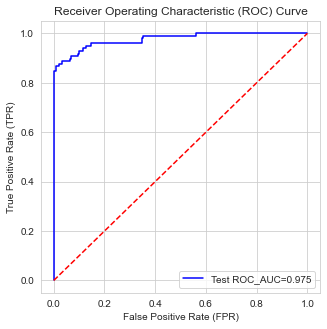


Time required to train the model: 5 minutes
****************************************************************************************************


In [59]:
# LOGISTIC REGRESSION MODEL (IMBALANCED DATASET)
# Building Model and Evaluating Results
results_df, clf_lr_imbal_data= LogisticRegression_StratifiedKFoldCV_Model(None, X_train_pt, y_train, 
                                            X_test_pt, y_test, "Power Transformer (Imbalanced Dataset)",
                                        "Logistic Regression with StratifiedKFoldCV", results_df)

#### <font color=DarkBlue> **1.2 Decision Tree Model (Imbalanced Dataset)**

****************************************************************************************************
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Data Handling Technique: Power Transformer (Imbalanced Dataset)
Model Name: Decision Tree with StratifiedKFoldCV


Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=5, random_state=0)
Best ROC_AUC (mean cross-validated score): 0.9696500652674303
Best (Optimal) Parameters: {'decisiontreeclassifier__min_samples_split': 5, 'decisiontreeclassifier__min_samples_leaf': 30, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__criterion': 'entropy'}

Optimal hyperparameters:
Best min_samples_split: 5
Best min_samples_leaf: 30
Best max_features: None
Best max_depth: 5
Best criterion: entropy

Prediction and Evaluation result

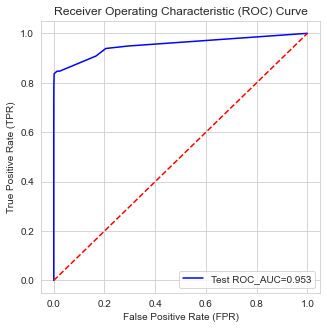


Time required to train the model: 3 minutes
****************************************************************************************************


In [60]:
## Decision Tree Model [Imbalanced Dataset]
results_df, clf_dt_imbal_data = DecisionTree_StratifiedKFoldCV_Model(None,X_train_pt, y_train, X_test_pt, y_test, 
                         "Power Transformer (Imbalanced Dataset)", "Decision Tree with StratifiedKFoldCV", results_df)

**Results from Model Building on Imbalanced dataset**

In [61]:
## Results from model building on Imbalanced dataset
results_imbal_df= results_df.copy()
results_imbal_df

,Data Handling Technique,Model,ROC_AUC_cv,ROC_AUC_test,Threshold,Precision,Recall,F1 score
0,Power Transformer (Imbalanced Dataset),Logistic Regression with StratifiedKFoldCV,0.979647,0.975363,0.004027,0.880597,0.602041,0.715152
1,Power Transformer (Imbalanced Dataset),Decision Tree with StratifiedKFoldCV,0.969650,0.952778,0.022727,0.884615,0.704082,0.784091



Our model's evaluation criterion is to correctly classify fraudulent transactions as such as opposed to legitimate ones. **A fraudulent transaction (True Positive) should not be classified or predicted as non-fraudulent (False Negative). This is due to the fact that the effects will be much more severe than a False Positive (incorrectly labelling a non-fraudulent transaction as fraudulent)**. Therefore, in addition to focusing on our precision and recall scores, we would additionally pay attention to our PR-AUC (which better depicts minority samples in an unbalanced dataset) and F1 Score.

In [62]:
## Function to calculate Precision-Recall AUC (PR_AUC)
def calc_print_PR_AUC(model_name,my_clf, y_true):
    y_pred_proba= my_clf.predict_proba(X_test_pt)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    pr_auc= auc(recall, precision)
    print(f"PR_AUC ({model_name}) = ", pr_auc)
    return pr_auc

In [63]:
## Also, checking Precision-Recall AUCs for all models as it is trained on imbalanced dataset

pr_auc_imbal_logreg= calc_print_PR_AUC("Logistic Regression [Imbalanced Dataset]", clf_lr_imbal_data, y_test)
pr_auc_imbal_dt= calc_print_PR_AUC("Decision Tree [Imbalanced Dataset]", clf_dt_imbal_data, y_test)

PR_AUC (Logistic Regression [Imbalanced Dataset]) =  0.7249803583919917
PR_AUC (Decision Tree [Imbalanced Dataset]) =  0.7810757654641018


**Observation:** .

In [64]:

#initialise the model with optimum hyperparameters 
clf = clf_dt_imbal_data      # Best Model   (already obtained after fitting on X_train_pt and y_train)

# Evaluation results on test set
y_pred_best_imbal= clf.predict(X_test_pt_df)                                       # Find predicted values
y_pred_probs_best_imbal= clf.predict_proba(X_test_pt_df)[:,1] 
print("Test auc (ROC_AUC)=", metrics.roc_auc_score(y_true= y_test, y_score= y_pred_probs_best_imbal))
fpr, tpr, thresholds = metrics.roc_curve(y_true= y_test, y_score= y_pred_probs_best_imbal)
threshold = thresholds[np.argmax(tpr-fpr)]
#Print threshold
print("Threshold =",threshold)
print("\nF1 Score:", metrics.f1_score(y_pred=y_pred_best_imbal, y_true=y_test))
print("Recall:", metrics.recall_score(y_pred=y_pred_best_imbal, y_true=y_test))
print("Precision:", metrics.precision_score(y_pred=y_pred_best_imbal, y_true=y_test))


Test auc (ROC_AUC)= 0.9527783081437413
Threshold = 0.022727272727272728

F1 Score: 0.7840909090909091
Recall: 0.7040816326530612
Precision: 0.8846153846153846


In [65]:
# Initialize the results_df to store new model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'ROC_AUC_cv', 'ROC_AUC_test', 'Threshold', 'Precision','Recall','F1 score'])



##### Perform class balancing with :
- ADASYN

In [66]:
# Initialize the results_df to store new model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'ROC_AUC_cv', 'ROC_AUC_test', 'Threshold', 'Precision','Recall','F1 score'])

In [67]:
# Initialize the results_df to store new model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'ROC_AUC_cv', 'ROC_AUC_test', 'Threshold', 'Precision','Recall','F1 score'])

### <font color=brown>**ADASYN**

#### <font color=DarkBlue> **4.A Logistic Regression Model - (Sampling Technique - ADASYN) - [Balanced Dataset]**

*(Note: num_C and cv_num are defined in the function LogisticRegression_StratifiedKFoldCV_Model()* - (defined earlier)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

**Perform StratifiedKFold Cross Validation on X_train (i.e. X_train_pt_df) and y_train**

In [68]:
## Checking patterns of StratifiedKFold cross-validation (and oversampling training folds using ADASYN) 
cv_num= 3                 ## Number of cross-validation splits
skf = StratifiedKFold(n_splits=cv_num, random_state=0, shuffle=True)

for train_index, test_index in skf.split(X_train_pt_df,y_train):
    X_train_cv, X_test_cv = X_train_pt_df.iloc[train_index], X_train_pt_df.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index],  y_train.iloc[test_index] 
    print("TRAIN:", train_index, "TEST:", test_index)
    ada = over_sampling.ADASYN(random_state=0)
    X_train_cv, y_train_cv = ada.fit_resample(X_train_cv, y_train_cv)

TRAIN: [     0      1      3 ... 227841 227842 227844] TEST: [     2      4      6 ... 227829 227836 227843]
TRAIN: [     1      2      3 ... 227842 227843 227844] TEST: [     0      9     12 ... 227837 227838 227841]
TRAIN: [     0      2      4 ... 227838 227841 227843] TEST: [     1      3      5 ... 227840 227842 227844]


*We will be performing cross-validation `using RandomizedSearchCV and passing model via 'imblearn pipeline package'` as stated in the modeling approach (which performs `ADASYN and StratifiedKFold cross-validation in a similar fashion` as seen above).*

### <font color=purple>Print the class distribution after applying ADASYN

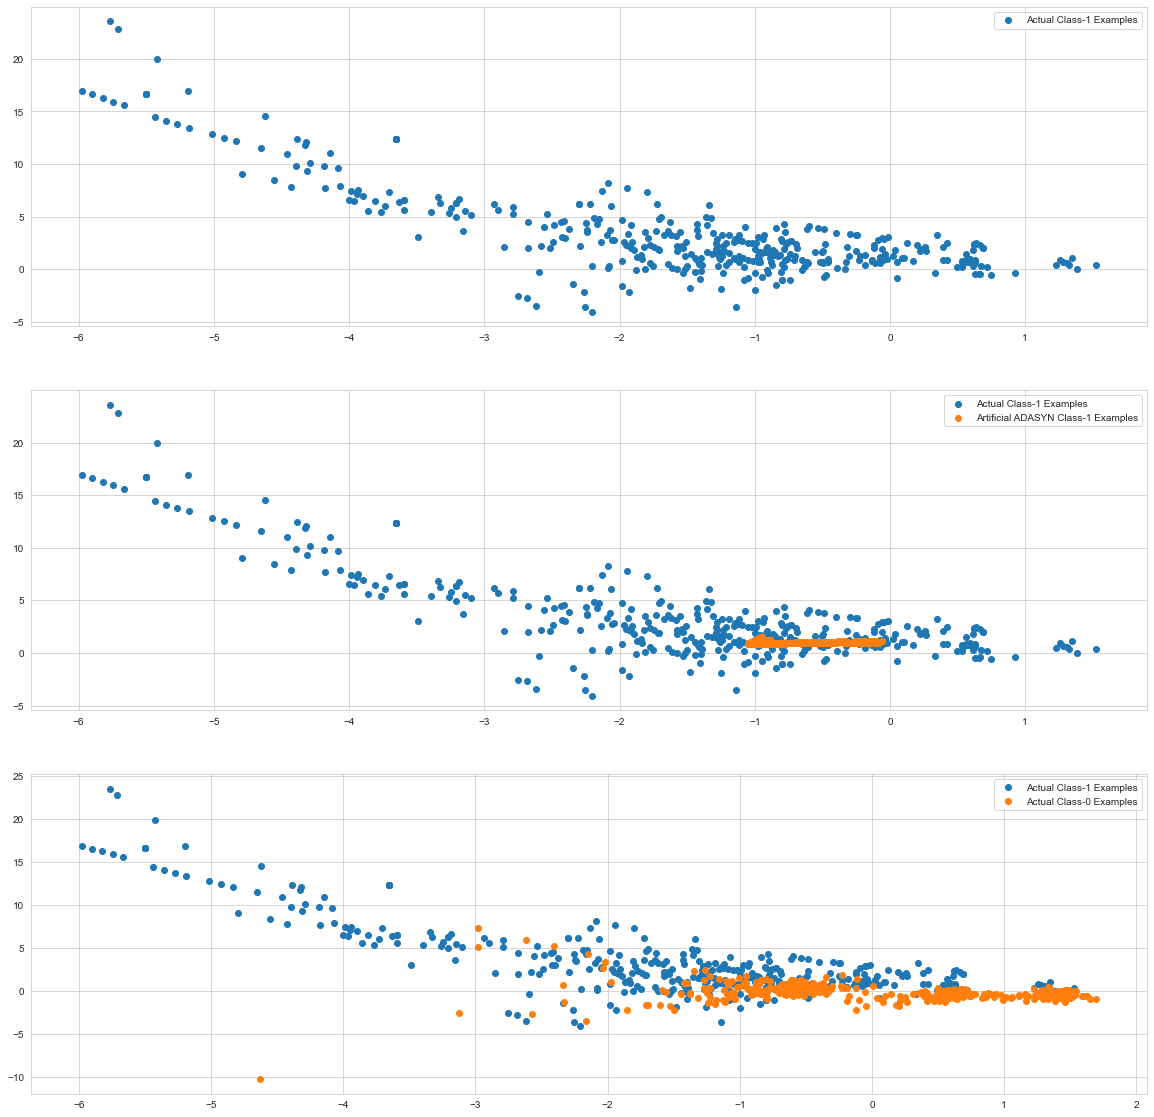

In [69]:
##Defining a function to print the class distribution after applying ADASYN
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

def class_distribution_after_adasyn(X_train, y_train):
    ada = over_sampling.ADASYN(random_state=0)
    X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
    # Artificial minority samples and corresponding minority labels from ADASYN are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from ADASYN, we do
    X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

    X_train_1 = X_train[np.where(y_train==1.0)]
    X_train_0 = X_train[np.where(y_train==0.0)]



    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()

    plt.subplot(3, 1, 1)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
                label='Artificial ADASYN Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
    plt.legend()

# Print the class distribution after applying ADASYN
class_distribution_after_adasyn(X_train_pt, y_train)

#### <font color=DarkBlue> **4.1 Logistic Regression Model - (Sampling Technique - ADASYN) - [Balanced Dataset]**

****************************************************************************************************
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Data Handling Technique: Power Transformer (ADASYN - Balanced Dataset)
Model Name: Logistic Regression with StratifiedKFoldCV


Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 LogisticRegression(C=0.0001, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='sag')
Best ROC_AUC (mean cross-validated score): 0.9779950355033115
Best (Optimal) Parameters: {'logisticregression__solver': 'sag', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.0001}

Optimal hyperparameters:
Best C value: 0.0001
Best penalty: l2
Best solver: sag

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 0.9786976516830705
Test Accuracy: 0.9251255222780099

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       1.00

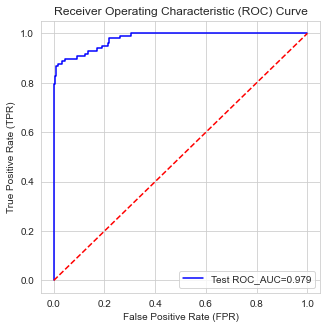


Time required to train the model: 3 minutes
****************************************************************************************************


In [70]:
## LOGISTIC REGRESSION MODEL (ADASYN) - BALANCED DATASET  
ada = over_sampling.ADASYN(random_state=0)          # Creating a class instance of ADASYN()
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)

# Building Model and Evaluating Results
results_df, clf_lr_adasyn_bal_data= LogisticRegression_StratifiedKFoldCV_Model(ada, X_train_pt, y_train, X_test_pt, y_test,
       "Power Transformer (ADASYN - Balanced Dataset)","Logistic Regression with StratifiedKFoldCV", results_df)

#### <font color=DarkBlue> **4.2 Decision Tree Model - (Sampling Technique - ADASYN) - [Balanced Dataset]**

****************************************************************************************************
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Data Handling Technique: Power Transformer (ADASYN - Balanced Dataset)
Model Name: Decision Tree with StratifiedKFoldCV


Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=20, random_state=0)
Best ROC_AUC (mean cross-validated score): 0.9483455268018556
Best (Optimal) Parameters: {'decisiontreeclassifier__min_samples_split': 20, 'decisiontreeclassifier__min_samples_leaf': 20, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'}

Optimal hyperparameters:
Best min_samples_split: 20
Best min_samples_leaf: 20
Best max_features: None
Best max_depth: 4
Best criterion: entropy

Prediction and Evaluat

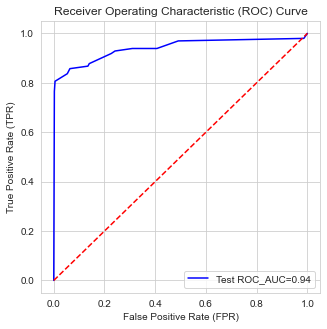


Time required to train the model: 5 minutes
****************************************************************************************************


In [71]:
## Decision Tree Model (ADASYN) - BALANCED DATASET        
# Building Model and Evaluating Results
results_df, clf_dt_adasyn_bal_data = DecisionTree_StratifiedKFoldCV_Model(ada, X_train_pt, y_train, 
                                 X_test_pt, y_test, "Power Transformer (ADASYN - Balanced Dataset)", 
                                                "Decision Tree with StratifiedKFoldCV", results_df)

**Results from Building Models on (ADASYN) Balanced Dataset**

In [72]:
## Results from building models on (ADASYN) balanced dataset
results_adasyn_bal_df= results_df.copy()
results_adasyn_bal_df

,Data Handling Technique,Model,ROC_AUC_cv,ROC_AUC_test,Threshold,Precision,Recall,F1 score
0,Power Transformer (ADASYN - Balanced Dataset),Logistic Regression with StratifiedKFoldCV,0.977995,0.978698,0.865234,0.020262,0.897959,0.039631
1,Power Transformer (ADASYN - Balanced Dataset),Decision Tree with StratifiedKFoldCV,0.948346,0.940200,0.972394,0.010687,0.877551,0.021117


**<font color=purple>Better performing model on Balanced Dataset (ADASYN):**<br><br>
**Observations:**
1. `ROC_AUC` seems to be a `better evaluation metric` in case of `models trained on balanced classes as it is able to clearly distinguish between the classes`. <br>
2. Among different competitive models, **Logistic Regression with StratifiedKFoldCV [ADASYN - Balanced Dataset]** seems to give best overall results - `Test AUC (97.86%)` along with a `high recall score (89.79%)`. A considerable decrease in precision is noticed but higher recall score meets our business objective and evaluation criteria as it identifies more number of fraud cases as frauds.

In [73]:
# Initialize the results_df to store new model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'ROC_AUC_cv', 'ROC_AUC_test', 'Threshold', 'Precision','Recall','F1 score'])

In [74]:
# Concatenating all the results to get the final results dataframe
df1= results_imbal_df.copy()                  # Results from imbalanced dataset models            
df4= results_adasyn_bal_df.copy()             # Results from ADASYN balanced dataset models
final_results_df= results_df.append([df1,df4], ignore_index=True)     # All results 
final_results_df

,Data Handling Technique,Model,ROC_AUC_cv,ROC_AUC_test,Threshold,Precision,Recall,F1 score
0,Power Transformer (Imbalanced Dataset),Logistic Regression with StratifiedKFoldCV,0.979647,0.975363,0.004027,0.880597,0.602041,0.715152
1,Power Transformer (Imbalanced Dataset),Decision Tree with StratifiedKFoldCV,0.969650,0.952778,0.022727,0.884615,0.704082,0.784091
2,Power Transformer (ADASYN - Balanced Dataset),Logistic Regression with StratifiedKFoldCV,0.977995,0.978698,0.865234,0.020262,0.897959,0.039631
3,Power Transformer (ADASYN - Balanced Dataset),Decision Tree with StratifiedKFoldCV,0.948346,0.940200,0.972394,0.010687,0.877551,0.021117


**Print the important features of the best model to understand the dataset**

In [75]:
# Evaluation results on Test set
print("Test auc =", metrics.roc_auc_score(y_true= y_test, y_score= clf.predict_proba(X_test_pt)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_true= y_test, y_score= clf.predict_proba(X_test_pt)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
#Print threshold
print("Threshold =",threshold)

Test auc = 0.9527783081437413
Threshold = 0.022727272727272728
